# **1.1 Señal Discreta**  

En esta sección, se genera la señal discreta $ x[n] $, se grafica y analiza sus componentes de frecuencia mediante la Transformada de Fourier Discreta (TFTD).

### Librerias

Se utilizan las librerías  `numpy`, `matplotlib` y `scipy` para resolver este ejercicio. Todas se encuentran explicadas en la seccion de `librerias`.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift

### Entrada

Se genera la señal de entrada basada en el número de alumno. En este caso 01425/3, por lo tanto 14.253. 

In [2]:
num_al = 14253 # Num de alumno

Las señales se encuentran en formato CSV en el directorio ```data/signals```. 

Para cargar la señal de CSV, se utiliza el script ```load_signal```

In [3]:
def load_signal(case_number, base_path="data/signals"):
    """
    Carga una señal desde un archivo CSV según el número de caso.

    Parámetros:
        case_number (int): Número de caso (0, 1, 2, 3).
        base_path (str): Ruta base donde se encuentran los archivos CSV.

    Retorna:
        n (numpy.ndarray): Instantes n (0 hasta longitud de la señal - 1).
        x (numpy.ndarray): Valores de la señal x[n].
    """
    # Construir la ruta del archivo CSV
    file_path = os.path.join(base_path, f"case{case_number}.csv")
    
    # Verificar si el archivo existe
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"El archivo {file_path} no existe.")
    
    # Cargar los valores de la señal desde el archivo CSV
    x = np.loadtxt(file_path, delimiter=",")
    
    # Generar los instantes n (0, 1, ..., len(x)-1)
    n = np.arange(len(x))
    
    return n, x

Se cargan las señales

In [4]:
n0, x0 = load_signal(0)  # Caso 0
n1, x1 = load_signal(1)  # Caso 1
n2, x2 = load_signal(2)  # Caso 2
n3, x3 = load_signal(3)  # Caso 3

Se grafican las señales de entrada

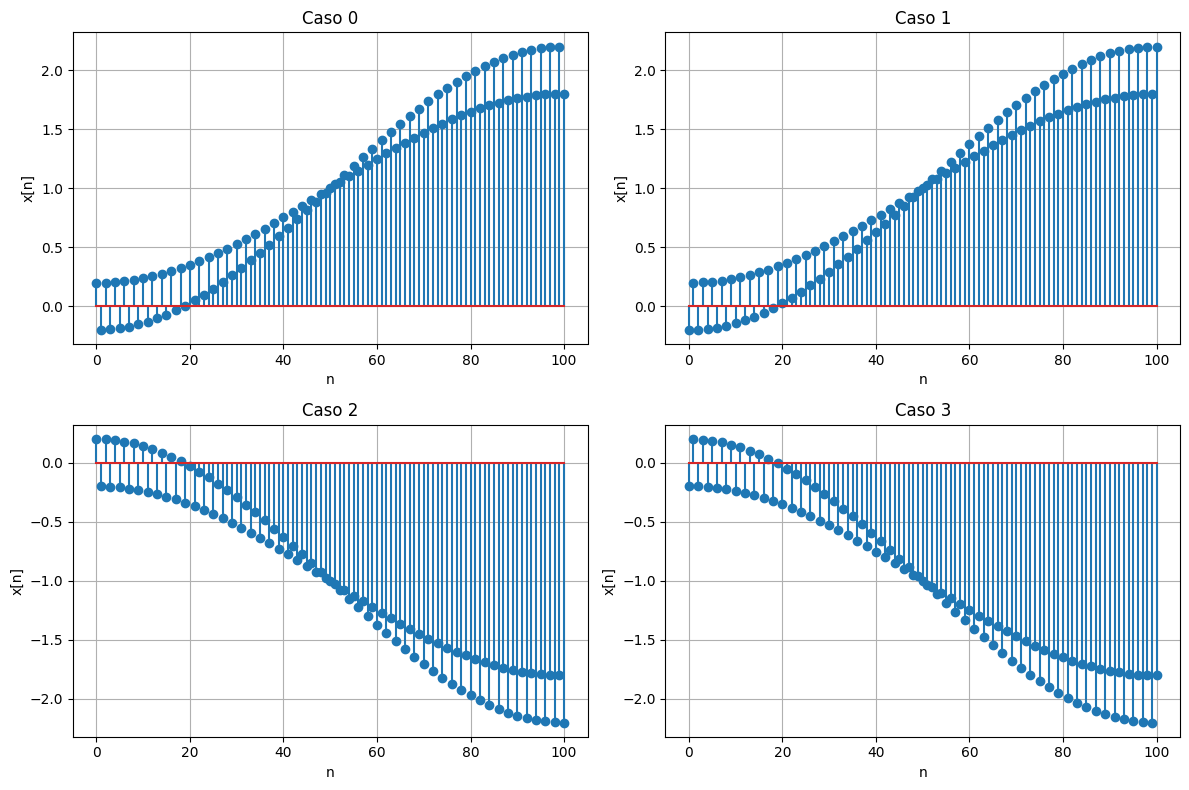

In [5]:
# Crear una figura con subplots para las cuatro señales
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Graficar Caso 0
axs[0, 0].stem(n0, x0)
axs[0, 0].set_title("Caso 0")
axs[0, 0].set_xlabel("n")
axs[0, 0].set_ylabel("x[n]")
axs[0, 0].grid()

# Graficar Caso 1
axs[0, 1].stem(n1, x1)
axs[0, 1].set_title("Caso 1")
axs[0, 1].set_xlabel("n")
axs[0, 1].set_ylabel("x[n]")
axs[0, 1].grid()

# Graficar Caso 2
axs[1, 0].stem(n2, x2)
axs[1, 0].set_title("Caso 2")
axs[1, 0].set_xlabel("n")
axs[1, 0].set_ylabel("x[n]")
axs[1, 0].grid()

# Graficar Caso 3
axs[1, 1].stem(n3, x3)
axs[1, 1].set_title("Caso 3")
axs[1, 1].set_xlabel("n")
axs[1, 1].set_ylabel("x[n]")
axs[1, 1].grid()

# Ajustar el diseño
plt.tight_layout()
plt.show()


Se selecciona la señal designada, basada en el número de alumno

El número de caso seleccionado es: 1


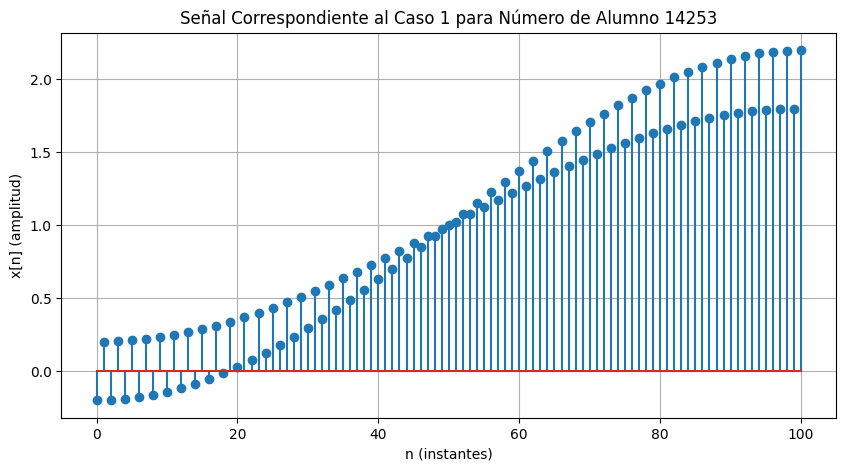

In [6]:
case_number = num_al % 4
print(f"El número de caso seleccionado es: {case_number}")

# Cargar la señal correspondiente
n, x = load_signal(case_number)

# Graficar la señal seleccionada
plt.figure(figsize=(10, 5))
plt.stem(n, x)
plt.title(f"Señal Correspondiente al Caso {case_number} para Número de Alumno {num_al}")
plt.xlabel("n (instantes)")
plt.ylabel("x[n] (amplitud)")
plt.grid()
plt.show()

### Análisis de Datos

La señal de entrada debe procesarse mediante la **Transformada de Fourier Discreta** (TFTD o DFT) permite transformar una señal discreta en el dominio del tiempo  en una representación en el **dominio de la frecuencia** 

$$ x[n] \xrightarrow{F} X[k] $$

Donde la transformada está dada por:

$$
X[k] = \sum_{n=0}^{N-1} x[n] e^{-j2\pi kn / N}, \quad k = 0, 1, \dots, N-1
$$

La **Transformada Rápida de Fourier** (FFT) es una implementación eficiente de la DFT.

Mediante la librería Scipy se importan las funciones de FFT. Por defecto, cuando se calcula la FFT con ```fft``` las frecuencias bajas se encuentran al comienzo del array de salida, seguidas por las frecuencias positivas y finalmente las negativas. Esto se conoce como **orden natural**

La salida de la ```fft``` de Scipy es un **array de números complejos**. El orden de las frecuencias de salida comienza con los valores positivos, desde cero hasta la **Frecuencia de Nyquist**.

Por su parte ```fftfreq``` permite asociar los índices de los espectros de frecuencia con su valor real en Hz. Es decir, asocia una frecuencia a cada componente de la FFT. La salida respeta el mismo orden que la ```fft``` normal.

Finalmente, la función ```fftshift``` reorganiza este resultado para que las frecuencias aparezcan ordenadas de menor a mayor, lo que resulta de utilidad al momento de graficar los espectros.

```py
# Calcular FFT
signal_fft = fft(signal) 

# Obtener frecuencias
frequencies = fftfreq(N, d=T) 

# Aplicar fftshift para centrar el espectro
fft_signal_shifted = fftshift(fft_signal)
frequencies_shifted = fftshift(frequencies)
```
  
En el caso del ejercicio a resolver:

In [7]:
# Numero de muestras
N = len(x)
Fs = 1000  # Frecuencia de muestreo (Hz)

# Calcular la FFT
X = fft(x)

# Calcular las frecuencias
frequencies = fftfreq(N, d=1/Fs)

# Centrar la FFT y las frecuencias
fft_output_shifted = fftshift(X)
frequencies_shifted = fftshift(frequencies)

# Calcular magnitud y fase
magnitude = np.abs(fft_output_shifted)
phase = np.angle(fft_output_shifted)

Se realiza el gráfico correspo ndiente de la magnitud y fase de la TFTD generada

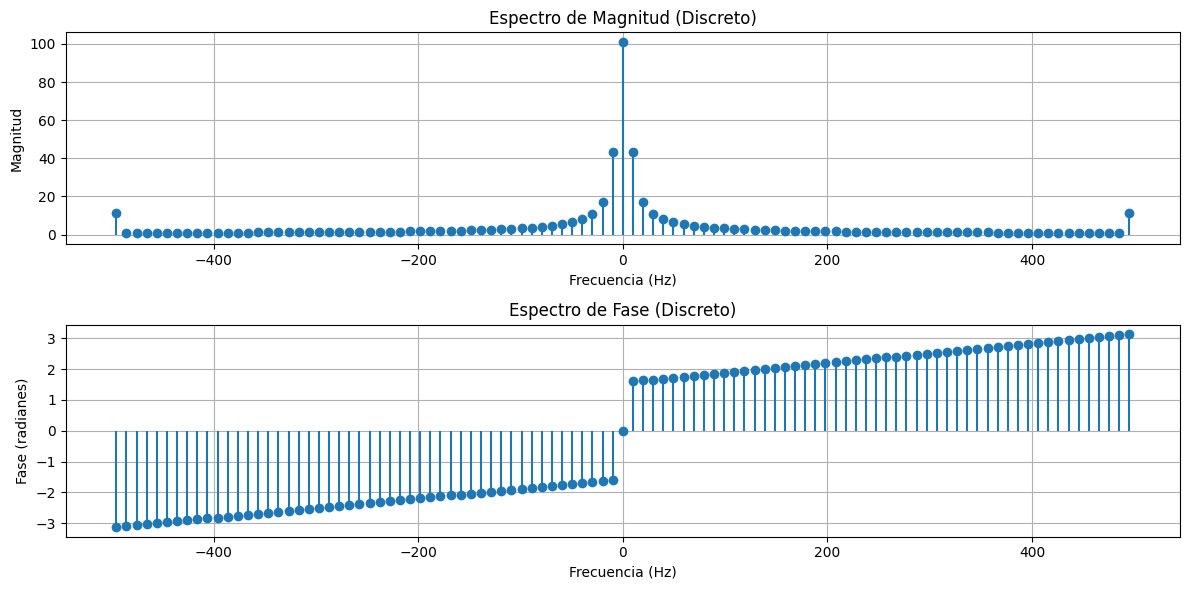

In [8]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.stem(frequencies_shifted, magnitude, basefmt=" ")
plt.title("Espectro de Magnitud (Discreto)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid()

# Graficar espectro de fase de forma discreta
plt.subplot(2, 1, 2)
plt.stem(frequencies_shifted, phase, basefmt=" ")
plt.title("Espectro de Fase (Discreto)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (radianes)")
plt.grid()

plt.tight_layout()
plt.show()

## Sistemas Discretos

Se dan sistemas están definidos por las siguientes **ecuaciones en diferencias**:

1. Sistema 1:  
   $$
   y[n] = \frac{1}{2}x[n] + \frac{1}{2}x[n-1]
   $$

2. Sistema 2:  
   $$
   y[n] = \frac{1}{2}x[n] - \frac{1}{2}x[n-1]
   $$

3. Sistema 3:  
   $$
   y[n] = \frac{1}{4}x[n] + \frac{1}{4}x[n-1] + \frac{1}{2}y[n-1]
   $$

4. Sistema 4:  
   $$
   y[n] = \frac{1}{4}x[n] - \frac{1}{4}x[n-1] - \frac{1}{2}y[n-1]
   $$

   